In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load and prepare dataset

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

In [9]:
target_labels = np.unique(y_train)
print(f"Target labels: {target_labels}")

Target labels: [0 1]


## Create and train ML model 

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu', 
                                                   input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# train the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 18ms/step - loss: 68.8819 - accuracy: 0.6346 - val_loss: 35.4286 - val_accuracy: 0.6044
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 12.6057 - accuracy: 0.5000 - val_loss: 11.8795 - val_accuracy: 0.3956
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 7.2461 - accuracy: 0.4286 - val_loss: 4.6064 - val_accuracy: 0.6484
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 2.9906 - accuracy: 0.6896 - val_loss: 2.1375 - val_accuracy: 0.5604
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 1.7517 - accuracy: 0.6868 - val_loss: 1.9038 - val_accuracy: 0.7253
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 1.4490 - accuracy: 0.7473 - val_loss: 1.6492 - val_accuracy: 0.7143
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 1.3740 - accuracy: 0.7720 - val_loss: 1.6012 - val_accuracy: 0.7582
Epoch 8/50
12/1

## Model evaluation 

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

In [23]:
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

4/4 [==============================] - 0s 2ms/step


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        43
           1       0.97      0.90      0.93        71

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



In [26]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)

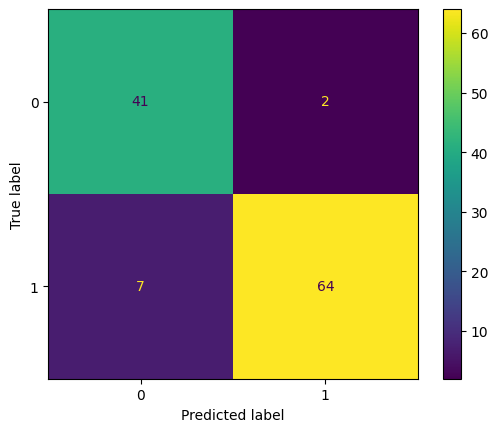

In [27]:
disp.plot()

## Rule extraction 

In [36]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [37]:
from dexire.dexire import DEXiRE

In [38]:
dexire = DEXiRE(model=model, class_names=['malignant', 'benign'])

In [39]:
rules = dexire.extract_rules(X_train, y_train)

12/12 [==============================] - 0s 1ms/step
Number of classes: [0. 1.]
12/12 [==============================] - 0s 2ms/step
6
feature_6
6
feature_6
1
feature_1
6
feature_6
1
feature_1
1
feature_1
2
feature_2
0
feature_0
1
feature_1
6
feature_6
6
feature_6
